In [1]:
#Biblioteca de Aprendizado de Máquina
import sklearn

In [2]:
#Realizando o carregamento do dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1,cache=True,as_frame=False)

In [3]:
#Visualizando rótulos de cada dado
import numpy as np
mnist.target = mnist.target.astype(np.int8) 
print (mnist.target)

[5 0 4 ... 4 5 6]


In [4]:
mnist.target

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [5]:
#Separando dado de rótulo
# X receberá os dados, Y receberá os rótulos dos mesmos
dado, rotulo = mnist["data"], mnist["target"]
print (dado.shape, rotulo.shape)

(70000, 784) (70000,)


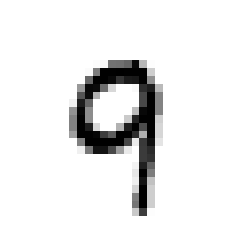

In [6]:
#Primeira visualização do dataset
import matplotlib
import matplotlib.pyplot as plt
digito = dado[1960]
digito_imagem = digito.reshape(28, 28)
plt.imshow(digito_imagem, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
rotulo[1960]

9

In [8]:
#Fazendo divisão de dataset
#1. Maneira de se fazer utilizando o próprio python (apenas se o dataset for embaralhado)
X_train, X_test, y_train, y_test = dado[:60000], dado[60000:], rotulo[:60000], rotulo[60000:]


In [9]:
#2. Maneira bacana e correta de se fazer isso 
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(dado, mnist.target, test_size=0.15, shuffle=False)

In [10]:
#Fazendo um embaralhamento dos dados (Caso opção 1 na divisão do dataset)
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [11]:
shuffle_index

array([16092, 56194, 47090, ..., 53927, 30789, 53398])

In [12]:
# Vamos limitar os dados a serem executados, do contrário o kernel do google colab vai morrer por conta da ram.
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [13]:
# Vamos realizar o treinamento de um modelo .....

In [14]:
#Neste caso em específico, vamos treinar utilizando um modelo de árvore de decisão
from sklearn.tree import DecisionTreeClassifier

arvore_decisao = DecisionTreeClassifier(random_state=42)
arvore_decisao.fit(X_train, y_train_5)
resultado_arvore = arvore_decisao.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_5,resultado_arvore)

0.9746

In [16]:
#Utilizando outro modelo!
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42) #Criando o objeto do algoritmo
forest.fit(X_train, y_train_5) # realizando o treinamento
resultado = forest.predict(X_test)

In [17]:
# Utilizando a acurácia para ter uma noção do quão bom foi nosso modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test_5,resultado)

0.9877